# Part II - Explanation of insights from the prosperLoanData
## by Sadura Priscilla Akinrinwa


### Investigation Overview
From the exploration of the prosper loan dataset carried out, it was discovered that there is a relationship between BorrowerAPR, EmploymentStatus and the Loan Status. In the explanatory analysis, visualizations that show the relationship between BorrowerAPR, EmploymentStatus and Loan Status will be displayed. This will give clearer visuals on the following obervations:

Borrowers in the Defalted, Past Due and Chargedoff Loan status categories have higher Borrower APR.

BorrowerAPR is highest in borrowers with defaulted loan status that had 12 month loan term. BorrowerAPR is lowest in borrowers with FinalPaymentinProgress Loan Status and 12 month payment term.

Borrowers whose BorrowerAPR are greater than 25% are more likely to not pay complete their Loan repayment. and BorrowerAPR. Employment Status 

The Not employed, Retired and Not available Borrower Status categories of borrowers are more likely to be Past Due on the repayment of their Loan.

> The overall goals of this presentation is to visualize: 
 - loan repayment status in comparison with BorrowerAPR
 - The employment status of borrowers that are more likely to default on the repayment of their Loan

### Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate, current loan status, borrower income, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# color defination
color = sb.color_palette('viridis_r')[1]

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Prosper_Loan_Update.csv')
df.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_NetPrincipalLoss,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,09:29.3,C,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,...,0,78,9425,330.43,0.0,1.0,0,0,0.0,258
1,28:07.9,NaN,36,Current,0.12016,0.0920,0.05470,7.0,2,CO,...,0,0,10000,318.93,0.0,1.0,0,0,0.0,1
2,00:47.1,HR,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,...,0,86,3001,123.32,0.0,1.0,0,0,0.0,41
3,02:35.0,NaN,36,Current,0.12528,0.0974,0.06000,9.0,16,GA,...,0,16,10000,321.45,0.0,1.0,0,0,0.0,158
4,38:39.1,NaN,36,Current,0.24614,0.2085,0.09066,4.0,2,MN,...,0,6,15000,563.97,0.0,1.0,0,0,0.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'12'}

In [4]:
# set a title and axis label function
def plotter(str1, str2, str3):
    plt.title(str1, **title_font)
    plt.ylabel(str2, **axis_font)
    plt.xlabel(str3, **axis_font);


In [5]:
# to order the loan status categories
LoanStatusOrder = ['Completed','Cancelled', 'Current', 'FinalPaymentInProgress','Defaulted','Past Due (1-15 days)',
        'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)' ,'Chargedoff']
Status = pd.api.types.CategoricalDtype(ordered=True, categories=LoanStatusOrder)
df['LoanStatus'] = df['LoanStatus'].astype(Status);

## Loan Status and BorrowerAPR

> From examining the Loan Status by BorrowerAPR plot below, it is noticed that BorrowerAPR of greater than 0.25 is common to Loan Status outcomes such as Defaulted, Past Due and Chargedoff.


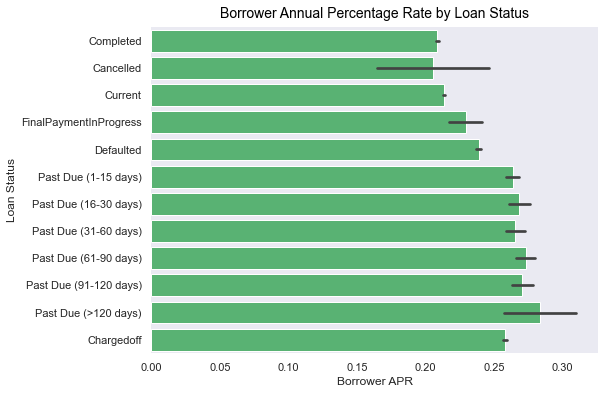

In [6]:
# adapted bar chart
plt.figure(figsize=[8,6])
sb.set(style="darkgrid")
sb.set_color_codes("muted")

# Create list of colors based on a condition 

# Create barplot 
ax = sb.barplot(data=df, y='LoanStatus', x='BorrowerAPR', color = color, orient='h')
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
plotter('Borrower Annual Percentage Rate by Loan Status', 'Loan Status', 'Borrower APR');


## Loan Status, Employment Status and BorrowerAPR

> From examining the heatmap on how employment status and BorrowerAPR affects loan status outcome, The retired and Self employed group are most likely to go more than 60 days Past Due on the repayment of their loan. 

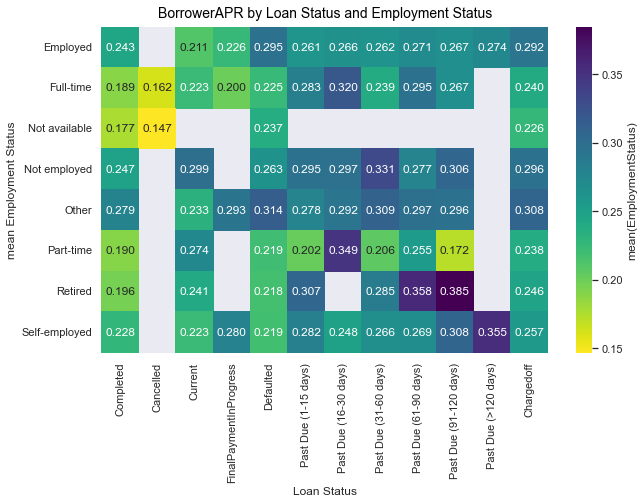

In [7]:
# plot on how employment status and BorrowerAPR affects loan status outcome
plt.figure(figsize = [10, 6])
cat_means = df.groupby(['LoanStatus', 'EmploymentStatus']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'LoanEmplStatus_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'LoanStatus',
                            values = 'LoanEmplStatus_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(EmploymentStatus)'}, cmap='viridis_r')
plotter("BorrowerAPR by Loan Status and Employment Status","mean Employment Status","Loan Status")


## How employment status affects loan status outcome - 1

> On this plot, we visualize the distribution of Employment Status column in relation with the Loan status variable. 

> From the visuals, the following are observed:
 - Borrowers that fall in the EmploymentStatus Employed category have the highest number of Loans, about 65000 borrowers of the 113,937 total borrowers. There are about 40000 current borrowers and over 10000 borrowers have completed the repayment of their loan.

 - The FullTime Employment Status category has the highest rate of Loan repayment completion. Of the about 2700 borrowers in this category, about 17000 have completed the repayment of their Loan.


In [8]:
colors = sb.color_palette('viridis_r')+sb.color_palette('Paired')

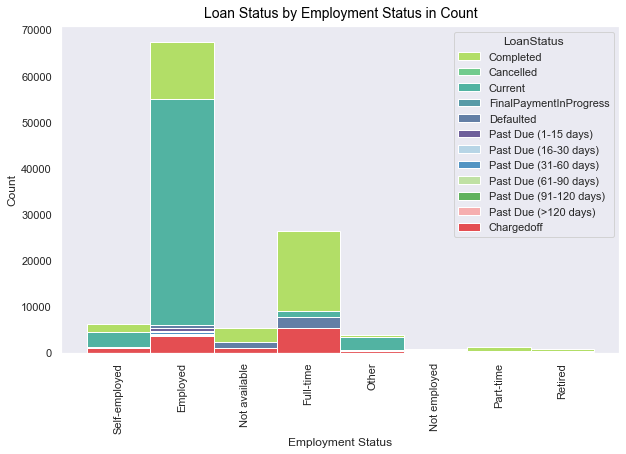

In [9]:
#plot on how employment status affects loan status outcome

plt.figure(figsize = [10, 6])


ax1= sb.histplot( binwidth=0.5, hue="LoanStatus", x="EmploymentStatus", data=df, stat="count", multiple="stack", palette=colors[:12])
labels = ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired']
ax1.set_xticklabels(labels, rotation = 90)
ax1.grid(False)
plotter("Loan Status by Employment Status in Count","Count","Employment Status");

## How employment status affects loan status outcome - 2
> This plot shows the Loan Status outcome of each of the employment Status categories.

> Borrowers in the Part time and Full time Employment Status categories have between 65 to 75% Loan repayment completion frequency. While more than 20% of the Borrowers who fall in the Retired and Not Employed Employment Status categories are Chargedoff Loan Status.

<Figure size 1440x360 with 0 Axes>

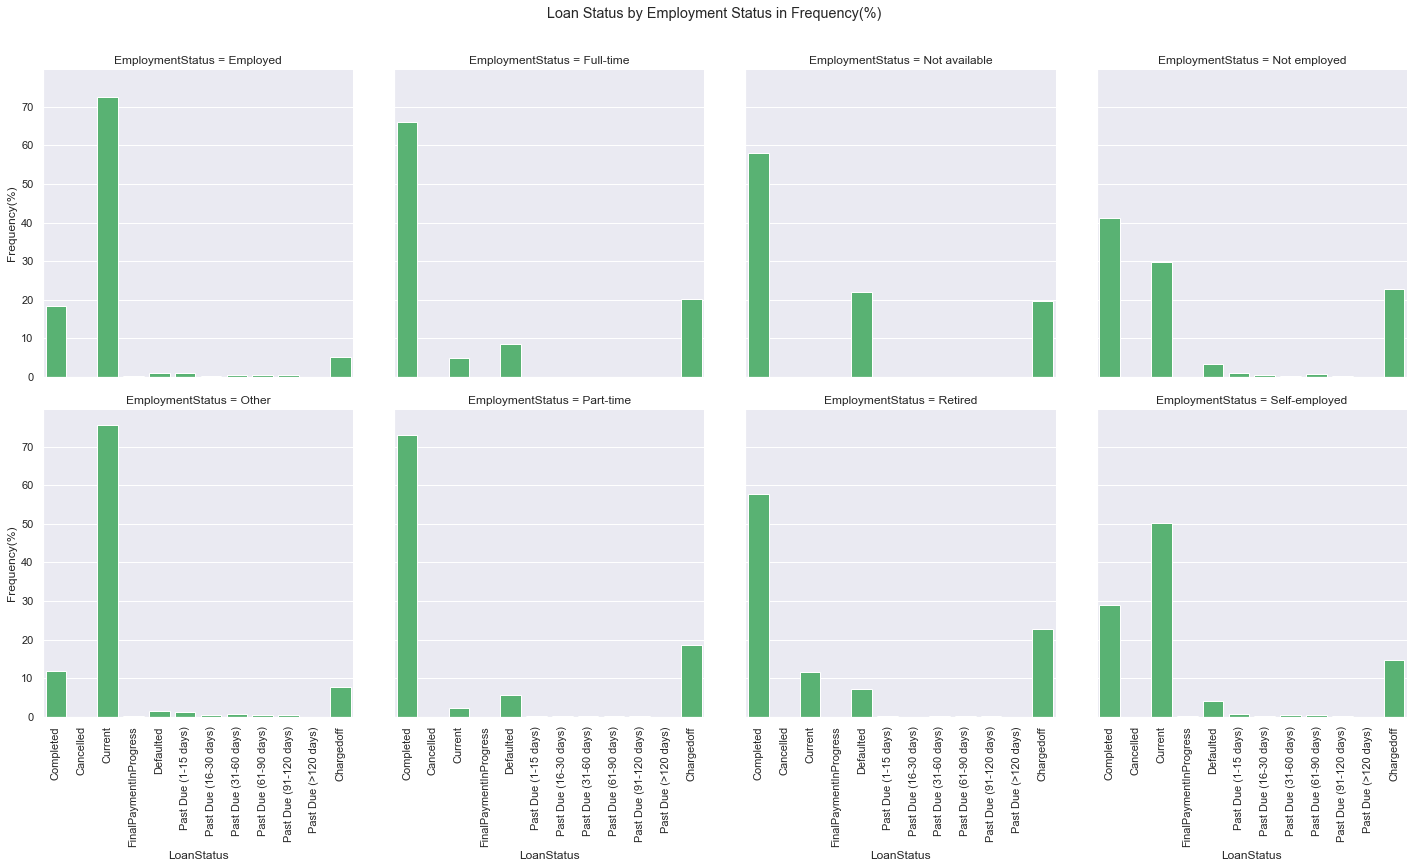

In [10]:
# plot 2 on how employment status affects loan status outcome
plt.figure(figsize = [20,5])

df_Term_Status = df.groupby(['EmploymentStatus'])['LoanStatus'].value_counts(normalize=True).reset_index().rename({'level_1':'LoanStatus', 'LoanStatus':'Frequency(%)'},axis = 1)
df_Term_Status['Frequency(%)'] = df_Term_Status['Frequency(%)']*100
g = sb.FacetGrid(df_Term_Status, col="EmploymentStatus", col_wrap=4, height=5)
ax2 = g.map(sb.barplot,  "LoanStatus", "Frequency(%)",color = color)
ax2.fig.suptitle("Loan Status by Employment Status in Frequency(%)", x=0.5, y=1.05)
#label
labels = ['Completed','Cancelled', 'Current', 'FinalPaymentInProgress','Defaulted','Past Due (1-15 days)',
        'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)' ,'Chargedoff']

ax2.set_xticklabels(labels, rotation = 90);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loan_slide_.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loan_slide_.ipynb to slides
[NbConvertApp] Writing 860647 bytes to Prosper_Loan_slide_.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\user\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "C:\Users\user\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 588, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\user\Anaco

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


##*Thank you*